In [1]:
# project: p2
# submitter: jchalem
# partner: none
# hours: 20

In [2]:
import loans, json, search, pandas as pd, csv, io, time
from zipfile import ZipFile, ZIP_DEFLATED
from io import TextIOWrapper

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
fhb = loans.Bank("First Home Bank")

In [5]:
#q1

total_interest_rate = 0
total_loans = 0
for loan in fhb:
    if loan.interest_rate != -1:
        total_interest_rate += loan.interest_rate
        total_loans += 1
total_interest_rate / total_loans

2.962962962962963

In [6]:
#q2

total_applicants = 0
total_loans = 0
for loan in fhb:
    total_applicants += len(loan.applicants)
    total_loans += 1
total_applicants / total_loans

1.5777777777777777

In [7]:
#q3

ages_dict = {}
for loan in fhb:
    for i in loan.applicants:
        for j in i.age:
            if j not in ages_dict:
                ages_dict[j] = 0
            ages_dict[j] += 1
ages_dict


{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [8]:
# Create tree for First Home Bank

t1 = search.BST()
for loan in fhb.loan:
    t1.add(loan.interest_rate, loan)

In [9]:
#q4
len(t1[-1])

18

In [10]:
#q5

t1.depth(t1.root)

9

In [11]:
for loan in fhb.loan:
    print(loan)

<Loan: -1% on $-1 with 2 applicant(s)>
<Loan: 2.5% on $235000.0 with 2 applicant(s)>
<Loan: 2.25% on $325000.0 with 2 applicant(s)>
<Loan: -1% on $-1 with 2 applicant(s)>
<Loan: 2.375% on $425000.0 with 2 applicant(s)>
<Loan: -1% on $-1 with 2 applicant(s)>
<Loan: 2.375% on $295000.0 with 1 applicant(s)>
<Loan: -1% on $95000.0 with 1 applicant(s)>
<Loan: 2.75% on $215000.0 with 1 applicant(s)>
<Loan: -1% on $-1 with 2 applicant(s)>
<Loan: 2.75% on $305000.0 with 1 applicant(s)>
<Loan: -1% on $-1 with 1 applicant(s)>
<Loan: 2.875% on $395000.0 with 2 applicant(s)>
<Loan: 3.125% on $205000.0 with 1 applicant(s)>
<Loan: 3.375% on $185000.0 with 1 applicant(s)>
<Loan: 4.0% on $265000.0 with 1 applicant(s)>
<Loan: -1% on $315000.0 with 2 applicant(s)>
<Loan: 4.625% on $175000.0 with 1 applicant(s)>
<Loan: 3.75% on $285000.0 with 2 applicant(s)>
<Loan: 2.875% on $285000.0 with 1 applicant(s)>
<Loan: 2.75% on $255000.0 with 2 applicant(s)>
<Loan: 3.0% on $265000.0 with 2 applicant(s)>
<Loan: 

In [12]:
uwcu = loans.Bank("University of Wisconsin Credit Union")

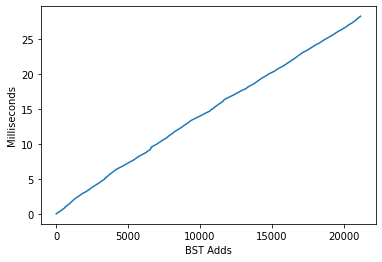

In [13]:
#q6

df = pd.DataFrame(dtype=float)
tree_uwcu = search.BST()
bst_adds = 0
total_time = 0
bst_dict = {}
for loan in uwcu.loan:
    t0 = time.time()
    tree_uwcu.add(loan.interest_rate, loan)
    t1 = time.time()
    total_time += (t1 - t0) * 1000
    bst_adds += 1
    bst_dict[bst_adds] = total_time
    
bst_series = pd.Series(bst_dict)
ax = bst_series.plot.line()
ax = ax.set(xlabel = "BST Adds", ylabel = "Milliseconds")

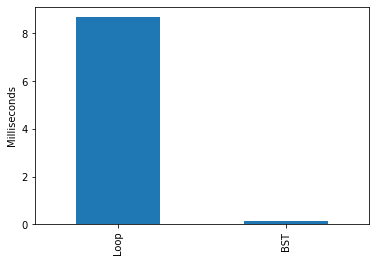

In [14]:
#q7

counter = 0
t0 = time.time()
for loan in uwcu.loan:
    if loan.interest_rate == -1:
        counter += 1
t1 = time.time()
loop_time = (t1 - t0) * 1000

t0 = time.time()
len(tree_uwcu[-1])
t1 = time.time()
lookup_time = (t1 - t0) * 1000

times = pd.Series({"Loop" : loop_time, "BST" : lookup_time})

ax = times.plot.bar()
ax = ax.set_ylabel("Milliseconds")

In [15]:
# Create dataframe of property values and loan amounts

values = []
for loan in uwcu.loan:
    if loan.property_value < 1000000:
        values.append([loan.property_value, loan.loan_amount])
df = pd.DataFrame(values, columns = ["Value", "Amount"])

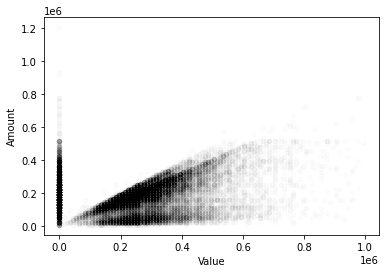

In [16]:
#q8

ax1 = df.plot.scatter(x='Value', y='Amount', alpha = 0.01, color = "black")

In [17]:
# Create dictionary of races and how often they appear

race_distribution = {}
for loan in uwcu:
    for i in loan.applicants:
        races_list = list(i.race)
        if len(races_list) > 1:
            for race in races_list:
                if race not in race_distribution:
                    race_distribution[race] = 0
                race_distribution[race] += 1
        elif len(races_list) == 1:
            if races_list[0] not in race_distribution:
                race_distribution[races_list[0]] = 0
            race_distribution[races_list[0]] += 1

        elif len(races_list) == 0:
            if "NA" not in race_distribution:
                race_distribution["NA"] = 0
            race_distribution["NA"] += 1

In [18]:
race_distribution

{'White': 28724,
 'Asian Indian': 437,
 'Asian': 1216,
 'NA': 3409,
 'Black or African American': 633,
 'Korean': 150,
 'Other Asian': 349,
 'Filipino': 110,
 'American Indian or Alaska Native': 204,
 'Vietnamese': 55,
 'Chinese': 271,
 'Japanese': 57,
 'Native Hawaiian or Other Pacific Islander': 19,
 'Guamanian or Chamorro': 5,
 'Other Pacific Islander': 8,
 'Native Hawaiian': 13}

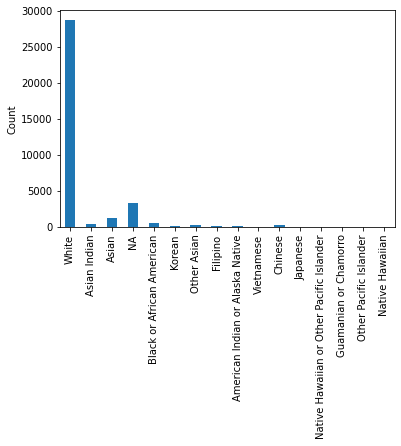

In [19]:
#q9

df = pd.Series(race_distribution)
ax = df.plot.bar()
ax = ax.set_ylabel("Count")

In [20]:
# Create tree for University of Wisconsin Credit Union

t2 = search.BST()
for loan in uwcu.loan:
    t2.add(loan.interest_rate, loan)

In [21]:
#q10

t2.number_nodes(t2.root)

32